In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.6,
            edgecolor='black',
            marker=markers[idx],
            label=cl)

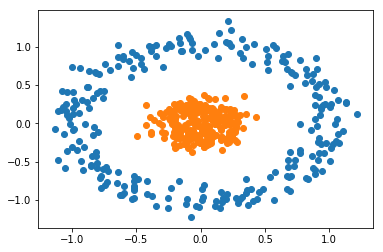

In [69]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
X, y = make_circles(n_samples=500,
                 random_state = 123,
                   noise = 0.1,
                   factor = 0.2)

plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

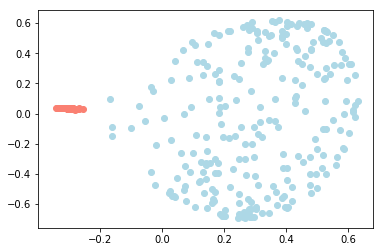

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2,
                kernel = "rbf",
                gamma = 15,
                random_state = 0)

X_kpca = kpca.fit_transform(X)

plt.scatter(X_kpca[y==0,0],X_kpca[y==0,1],color = "salmon")
plt.scatter(X_kpca[y==1,0],X_kpca[y==1,1],color = "lightblue")
plt.show()

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 10, solver = "liblinear",multi_class="auto")
lr.fit(X_kpca,y)
from sklearn.model_selection import GridSearchCV
param_grid = [{
    "solver":['newton-cg', 'lbfgs', 'sag', 'saga'],
    "multi_class":['ovr', 'multinomial', 'auto'],
    "C":np.linspace(10,100,20)
}]
grid = GridSearchCV(estimator=lr,
                   param_grid = param_grid,
                   cv = 10,
                   n_jobs = -1,
                   scoring = "accuracy")
grid.fit(X_kpca, y)
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

LogisticRegression(C=62.10526315789473, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)
{'C': 62.10526315789473, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.998


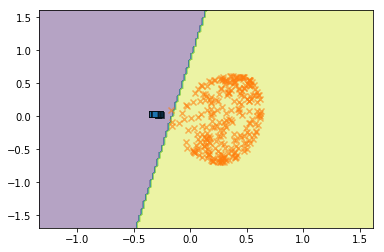

In [76]:
lr = LogisticRegression(C = 62.10526315789473,
                       multi_class="multinomial",
                       solver = 'newton-cg')
lr.fit(X_kpca,y)
import numpy as np
plot_decision_regions(X_kpca,y,lr)

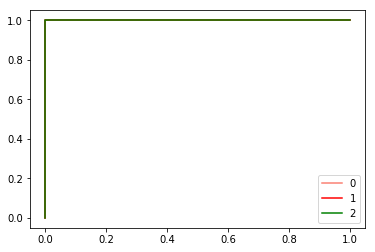

In [77]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve
cv = list(StratifiedKFold(n_splits=3,random_state = 0).split(X_kpca,y))
lr.fit(X_kpca,y)
color = ["salmon","red","green"]
i  = 0
for (train,test),c in zip(cv,color):
    lr_prob = lr.fit(X_kpca[train],y[train]).predict_proba(X_kpca[test])
    fpr,tpr, threshold = roc_curve(y[test],lr_prob[:,1],pos_label = 1)
    plt.plot(fpr,tpr,color = c,label = i)
    i+=1
    
plt.legend(loc = "best")
plt.show()

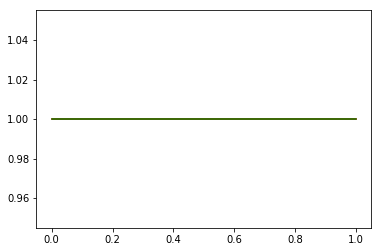

In [78]:
for (train,test),c in zip(cv,color):
    lr_prob = lr.fit(X_kpca[train],y[train]).predict_proba(X_kpca[test])
    precision, recall, threshold = precision_recall_curve(y[test],lr_prob[:,1],pos_label = 1)
    plt.plot(recall, precision,color = c, label = i)
    i+=1

A perfect ROC and Precision-Recall score

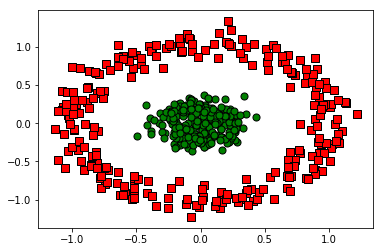

In [79]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.2,min_samples = 5,
           metric = "euclidean")
y_db =  db.fit_predict(X)
plt.scatter(X[y_db == 0,0],X[y_db == 0,1],color = "r",marker = "s",edgecolor = "k",s = 50)
plt.scatter(X[y_db == 1,0],X[y_db == 1,1],color = "g",marker = "o",edgecolor = "k",s = 50)
plt.show()

Silhouette plot for clustering

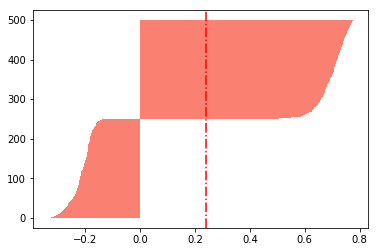

In [80]:
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y)

y_ax_lower, y_ax_upper = 0,0
db = DBSCAN(eps = 0.2,min_samples = 5,
               metric = "euclidean")

silhouette_vals = silhouette_samples(X,db.fit_predict(X),metric = "euclidean")

for i in cluster_labels:
    c_silhouette_vals  = silhouette_vals[y==i]
    y_ax_upper += len(c_silhouette_vals)
    c_silhouette_vals.sort()
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,
                height = 1.0,edgecolor = None,color = "salmon")
    y_ax_lower += len(c_silhouette_vals)
plt.axvline(np.mean(silhouette_vals),ls = "-.",color = "red")

plt.show()

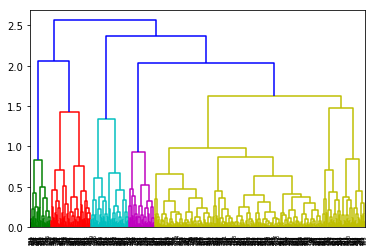

In [81]:
from scipy.cluster.hierarchy import linkage, dendrogram
dendo = dendrogram(linkage(X,method = "complete"))

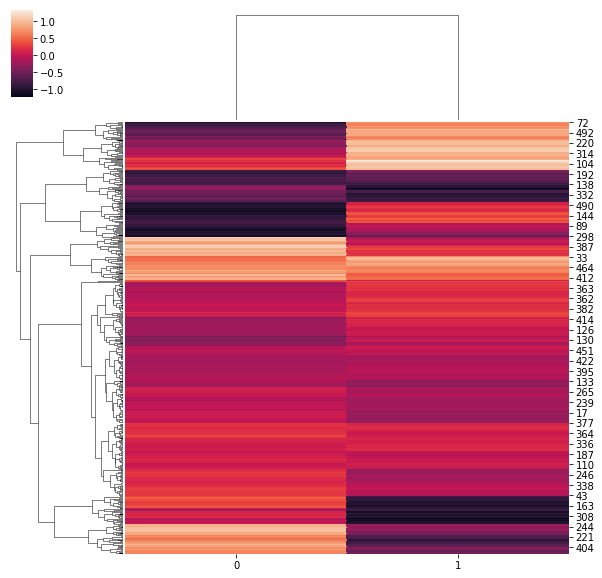

In [82]:
import seaborn as sns
sns.clustermap(X)
plt.show()